In [1]:
library(forecast)
library(zoo)
library(data.table)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Anexando pacote: 'zoo'


Os seguintes objetos são mascarados por 'package:base':

    as.Date, as.Date.numeric



Anexando pacote: 'data.table'


Os seguintes objetos são mascarados por 'package:zoo':

    yearmon, yearqtr




In [2]:
data = EuStockMarkets

In [3]:
head( data ,n = 4)

,DAX,SMI,CAC,FTSE
1991.496,1628.75,1678.1,1772.8,2443.6
1991.500,1613.63,1688.5,1750.5,2460.2
1991.504,1606.51,1678.6,1718.0,2448.2
1991.508,1621.04,1684.1,1708.1,2470.4


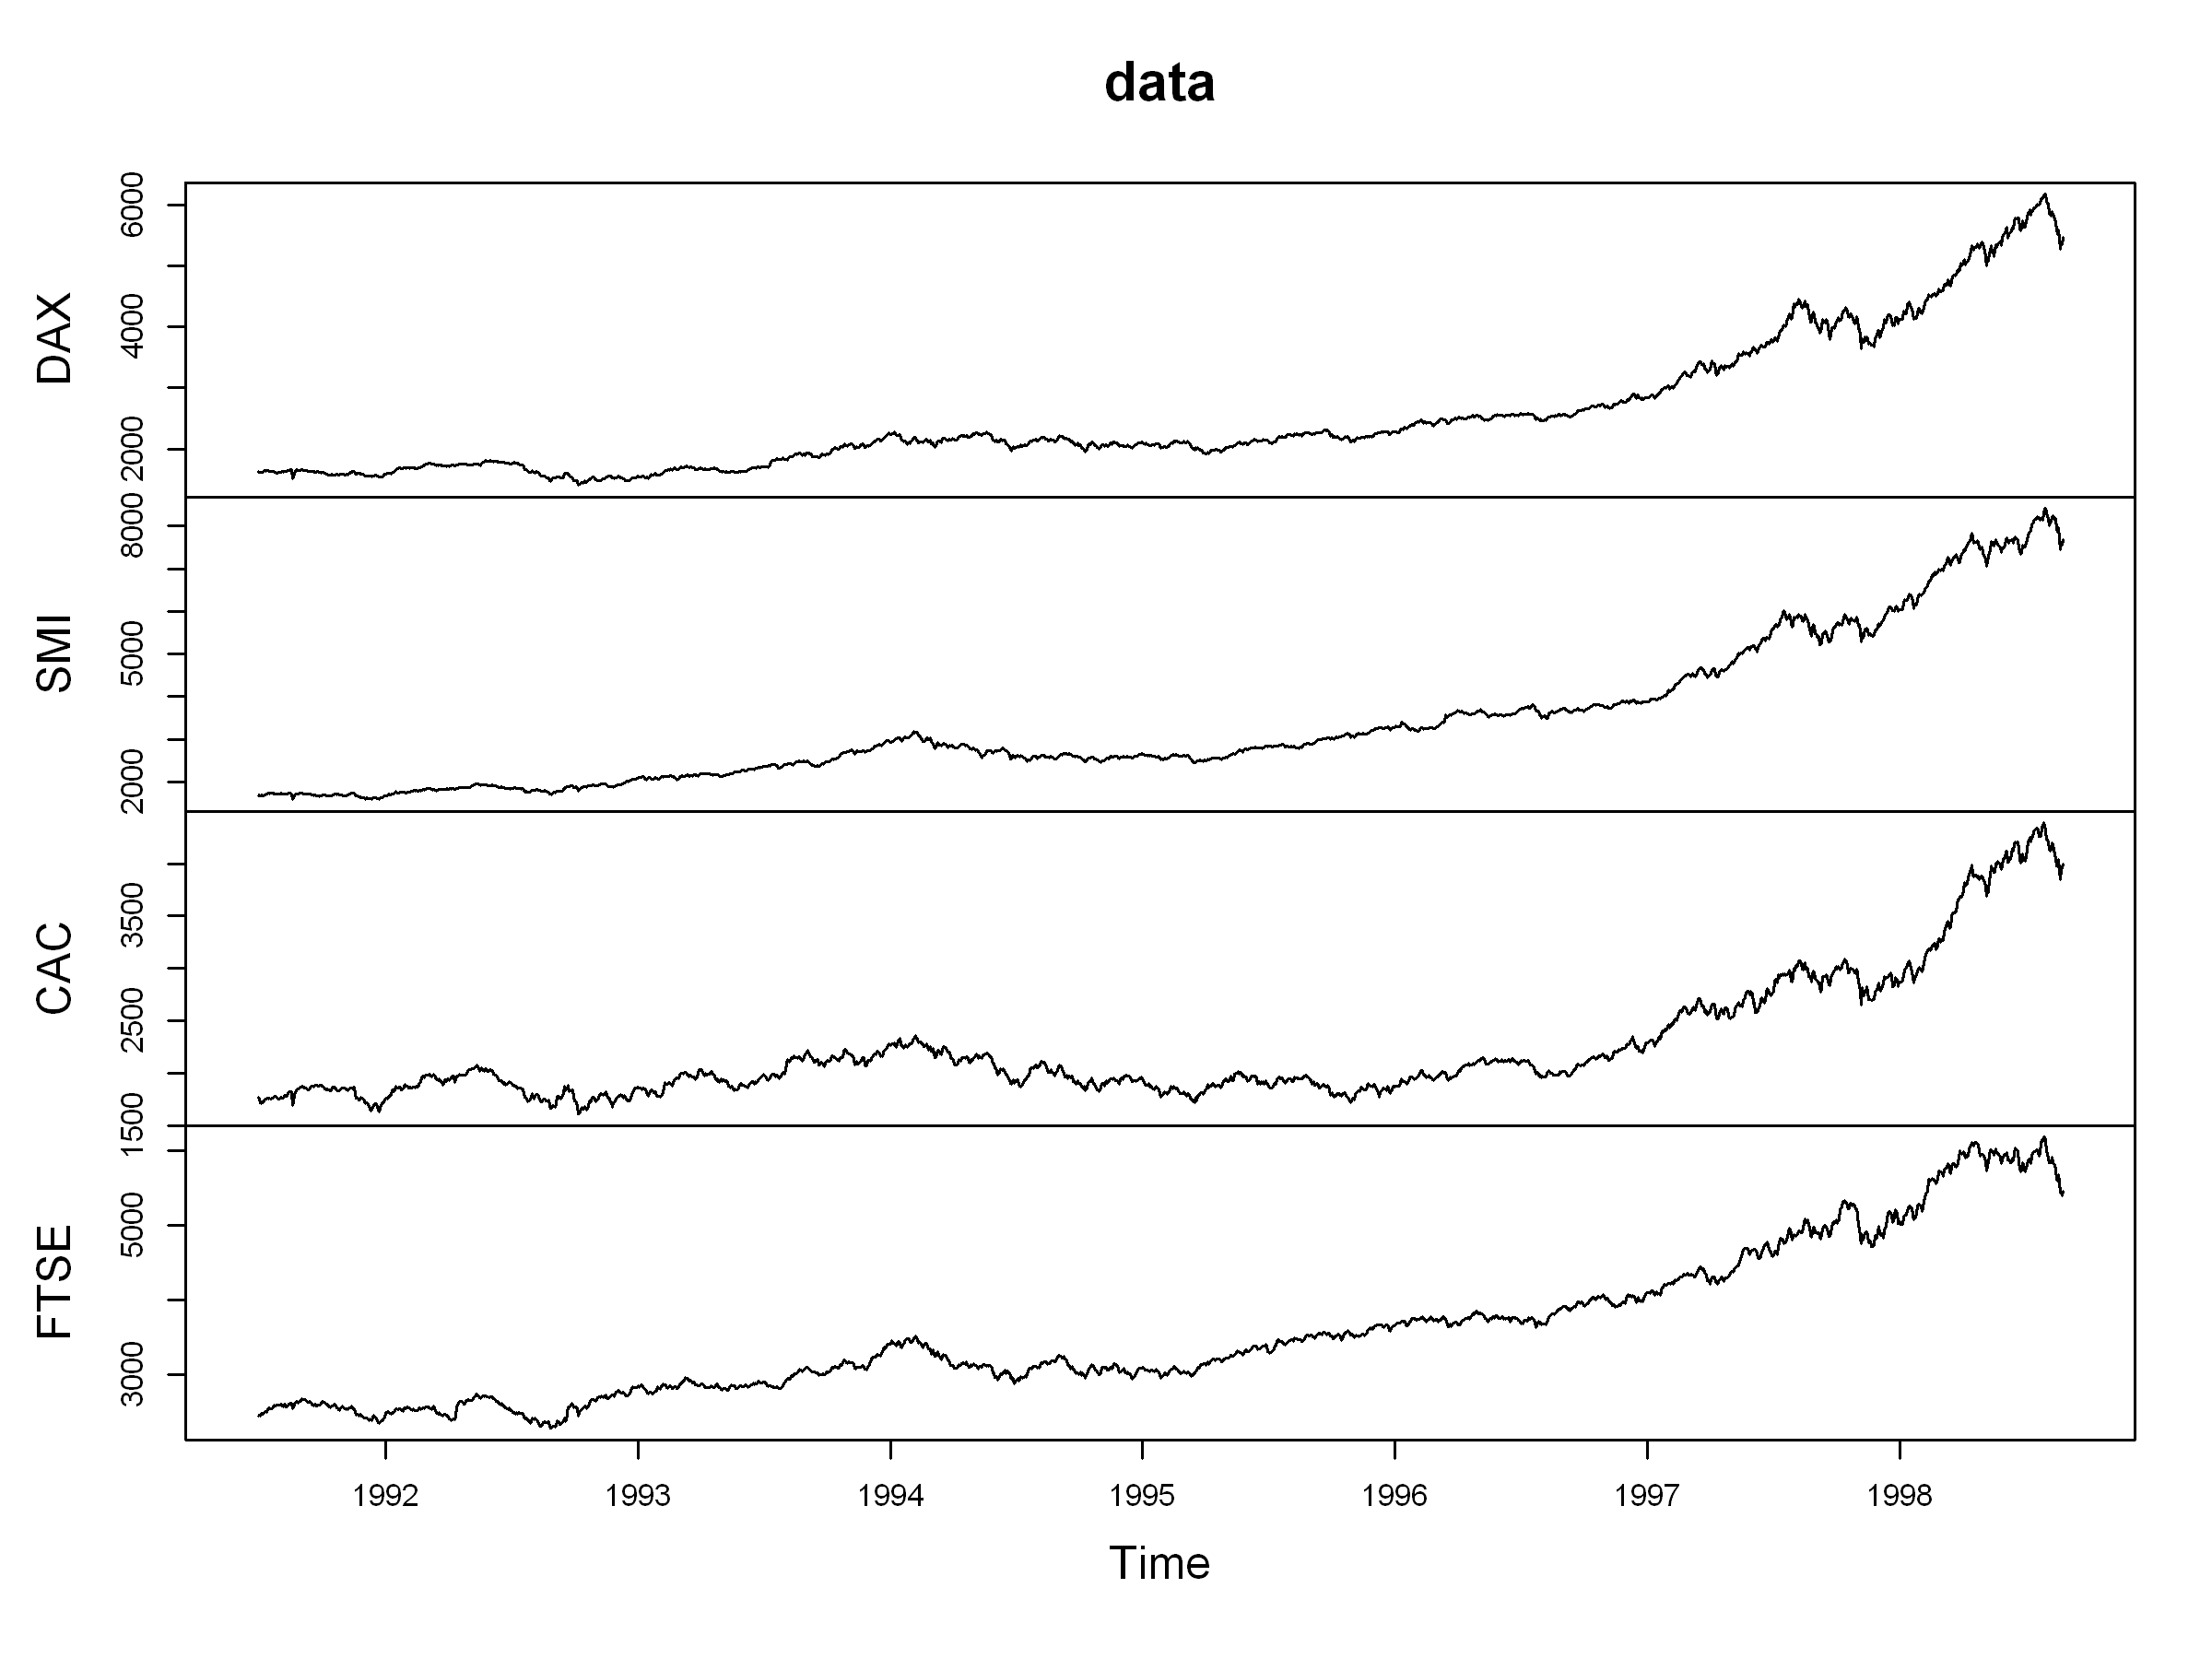

In [4]:
par(bg='white')
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)

plot(data)

In [5]:
# Objeto mts
class(data)

[1] "mts"    "ts"     "matrix" "array"

In [6]:
# frequencia dos dados
frequency(data)

[1] 260

In [7]:
# primeiro e ultim tempo representado
print(start(data))
print(end(data))

[1] 1991  130
[1] 1998  169


In [8]:
# obtem um seção temporal dos dados
head( window(data, start = 1997, end = 1998), n = 5)

,DAX,SMI,CAC,FTSE
1997.000,2844.09,3869.8,2289.6,4092.5
1997.004,2844.09,3869.8,2289.6,4092.5
1997.008,2844.09,3869.8,2303.8,4092.5
1997.012,2859.22,3922.2,2307.0,4091.0
1997.015,2880.07,3948.3,2318.6,4115.7


Criando um histograma de dadados diferenciados

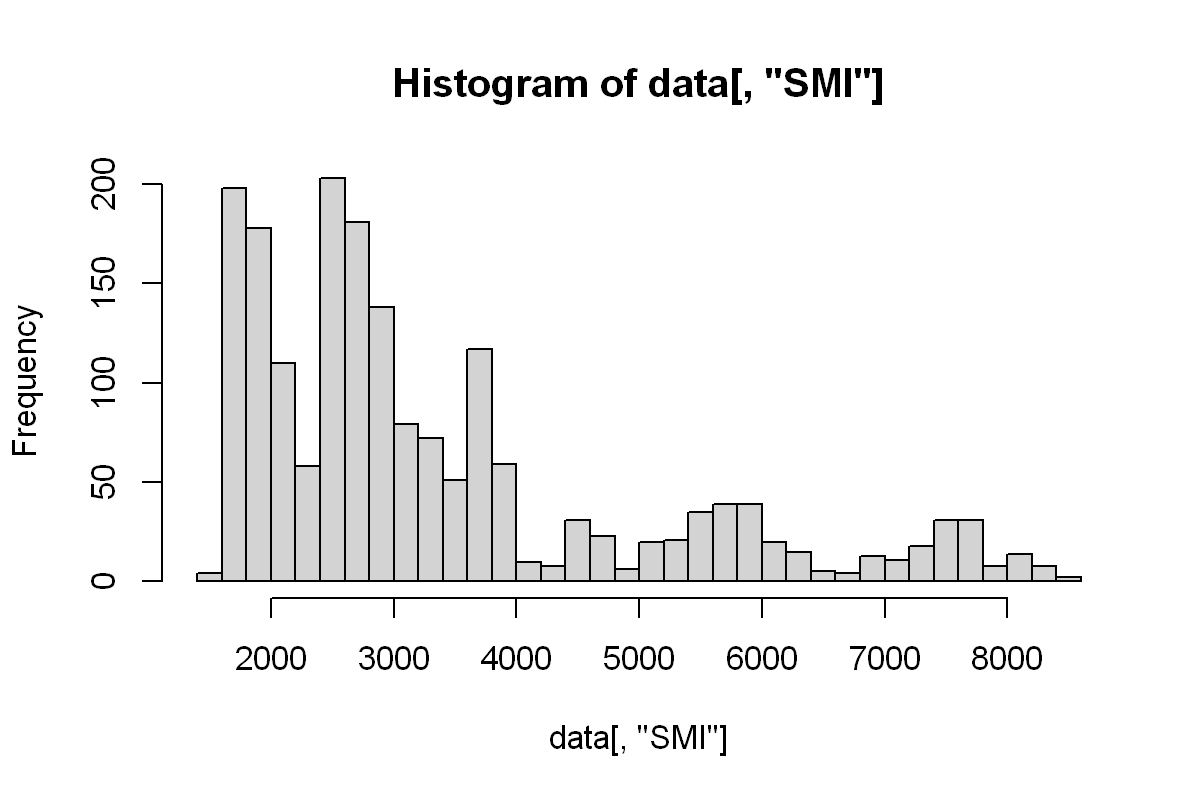

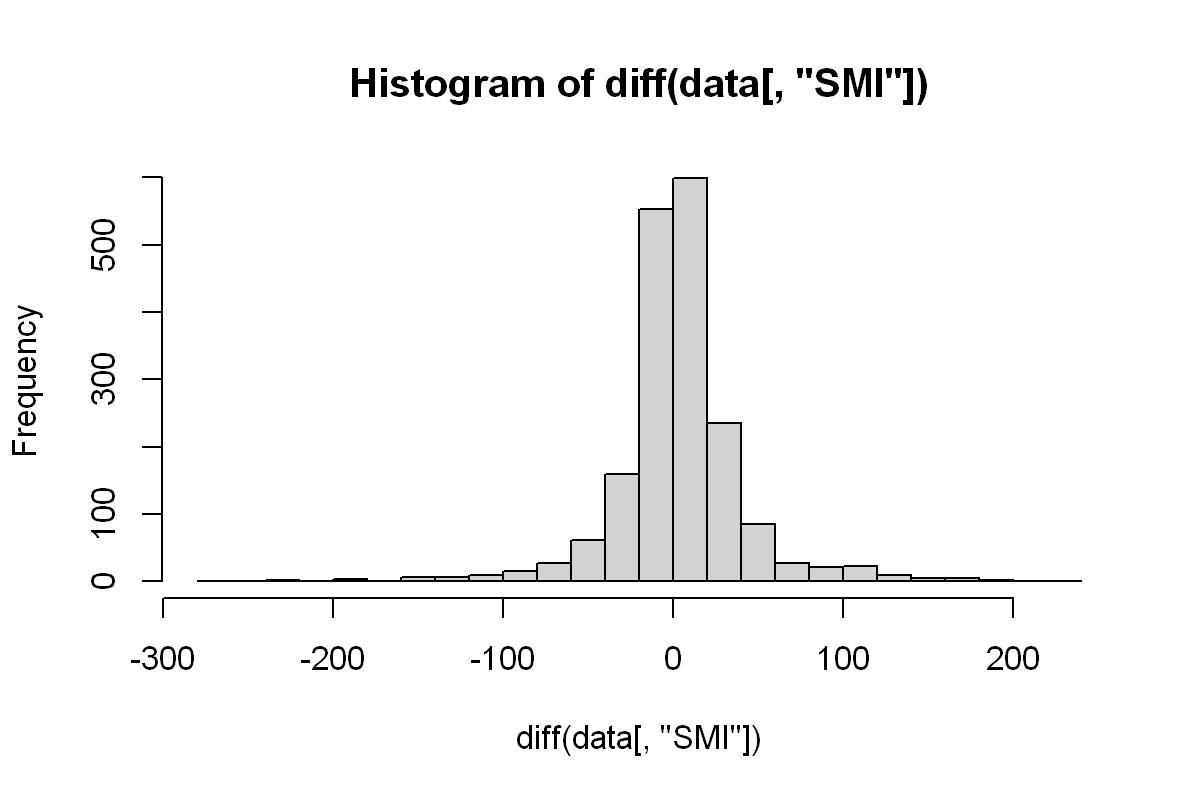

In [9]:
par(bg='white')
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)

hist(data[, "SMI"], 30)
hist(diff(data[, "SMI"]), 30)


> Em series temporais é melhor utilizar hist dos dados da diferença 

#### grafico dispersão

Verificando como duas ações estão vinculadas em um tempo especifico e como a mudança de preço relacionadas ao longo do tempo

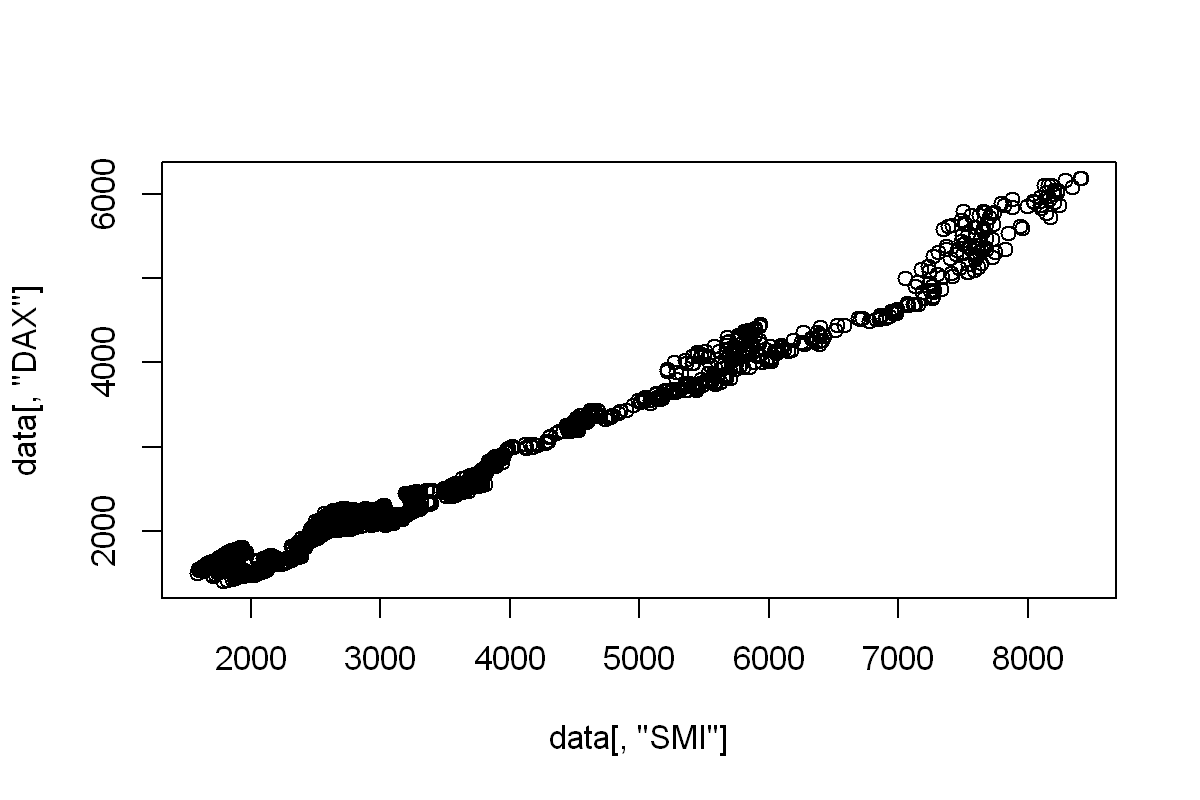

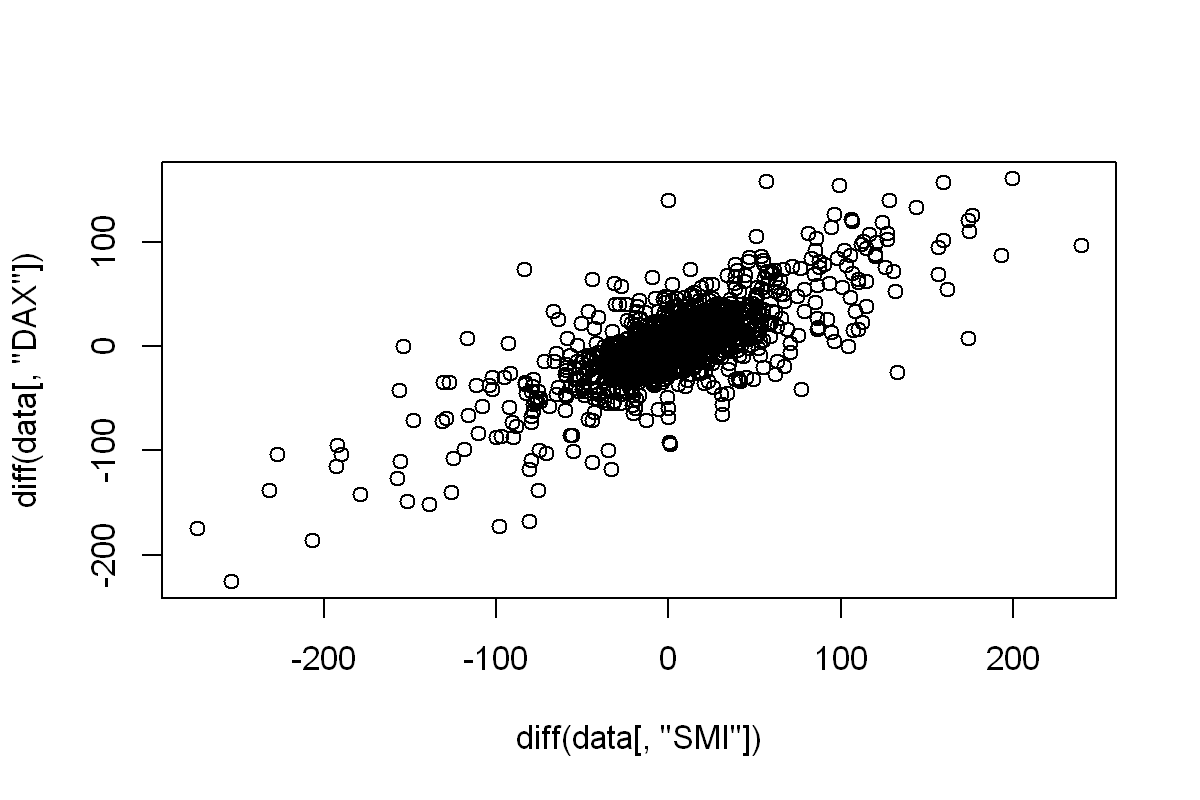

In [10]:
par(bg='white')
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)

plot(data[,"SMI"], data[, "DAX"])
plot(diff(data[, "SMI"]), diff(data[, "DAX"]))

> Os valores reais são menos informativos do que as diferança entre pontos de tempos adjacentes, por isso plotamos as diferenças em um segundo gráfico de dispersão.

Verificando se mudança de tempo anterior de uma ação 

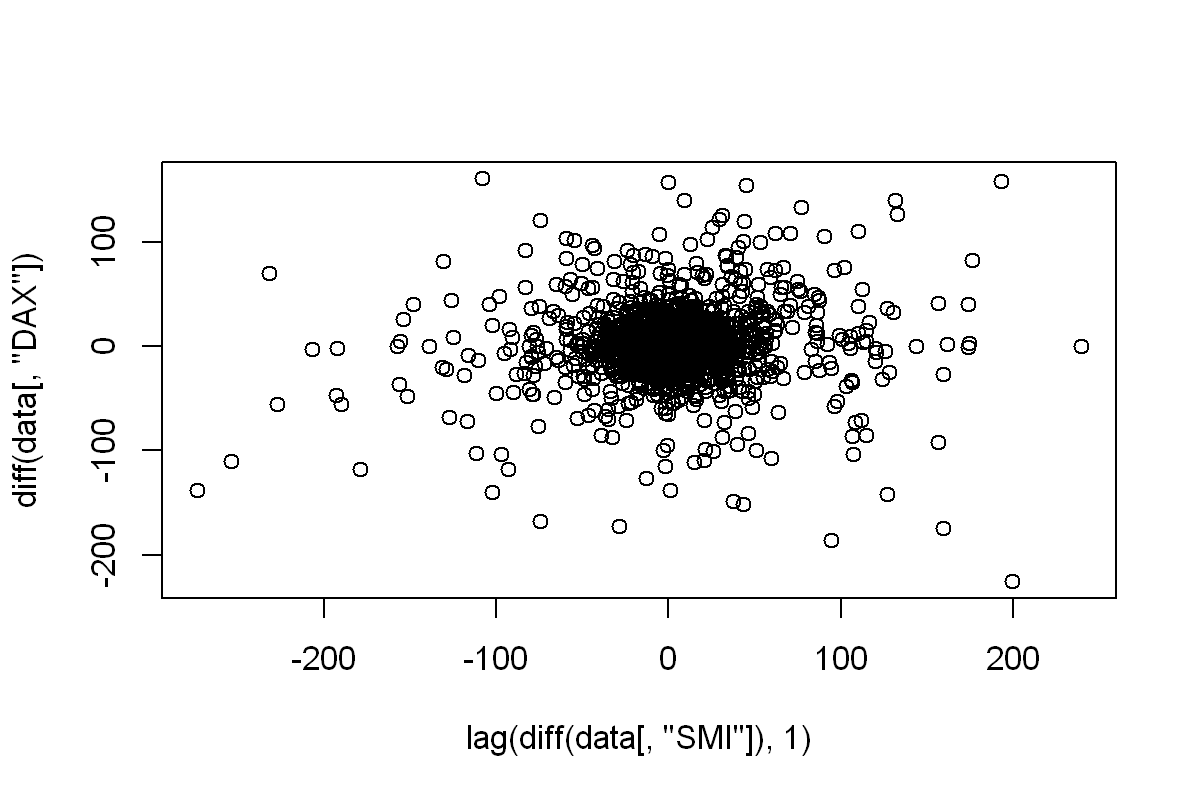

In [11]:
par(bg='white')
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)


plot(lag(diff(data[, "SMI"]), 1), diff(data[, "DAX"]))